In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [27]:
milk=pd.read_csv("TimeSeriesForcasting.csv")

In [28]:
milk.head()

,Month,Monthly milk production (pounds per cow)
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [29]:
#converting to date type
milk["Month"]=pd.to_datetime(milk["Month"])
milk.head()

,Month,Monthly milk production (pounds per cow)
0,1962-01-01,589
1,1962-02-01,561
2,1962-03-01,640
3,1962-04-01,656
4,1962-05-01,727


In [30]:
milk.set_index("Month",inplace=True)

In [32]:
milk.head()

,Monthly milk production (pounds per cow)
Month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


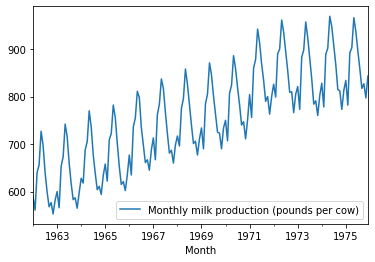

In [33]:
milk.plot()
# has a seasonal and upward trend

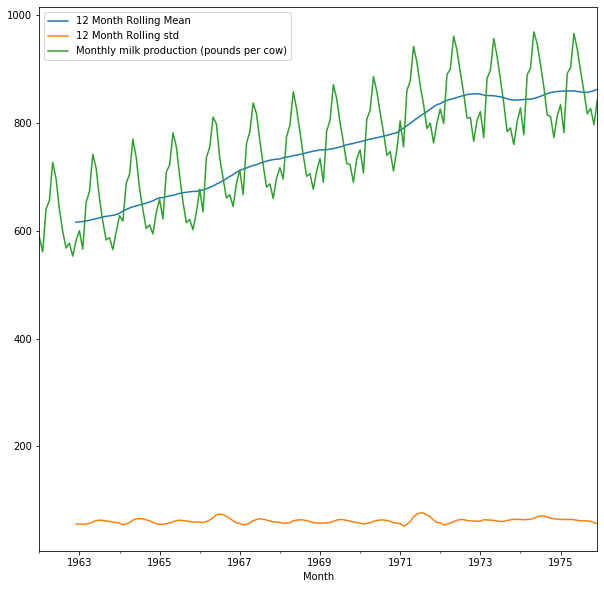

In [40]:
plt.figure(figsize=(10,10))
ts=milk["Monthly milk production (pounds per cow)"]
ts.rolling(12).mean().plot(label="12 Month Rolling Mean")
ts.rolling(12).std().plot(label="12 Month Rolling std")
ts.plot()
plt.legend()
#the rolling std seems to be similar. However, the rolling mean has an upward trend

<Figure size 432x288 with 0 Axes>

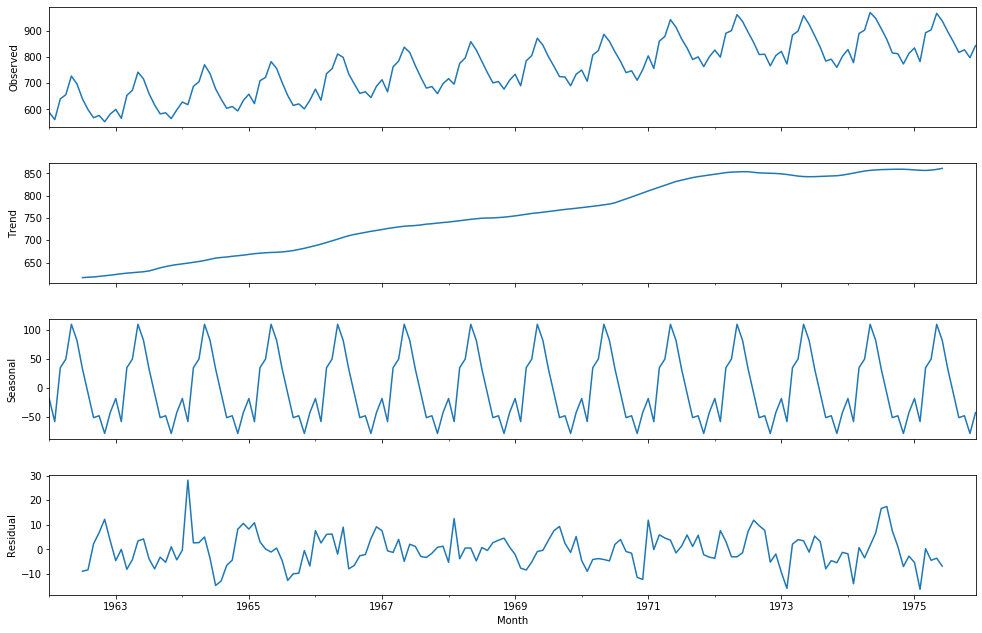

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose=seasonal_decompose(milk["Monthly milk production (pounds per cow)"],freq=12)
figure=plt.figure()
figure=decompose.plot()
figure.set_size_inches(15,10)

In [60]:
# check to see if the data stationary-Dickey Fuller test 
from statsmodels.tsa.stattools import adfuller
test=adfuller(milk["Monthly milk production (pounds per cow)"])
print('Ad Fuller test')
labels=["ADF Stats","p-value","No. of Lags used","No. of Obs used"]
for value, label in zip(test,labels):
    print(label+':'+str(value))
if test[1]<=0.05:
    print("Data is Stationary")
else:
    print("Data is not Stationary")

Ad Fuller test
ADF Stats:-1.3038115874221246
p-value:0.627426708603034
No. of Lags used:13
No. of Obs used:154
Data is not Stationary


In [61]:
def check(t_s):
    test=adfuller(t_s)
    print('Ad Fuller test')
    labels=["ADF Stats","p-value","No. of Lags used","No. of Obs used"]
    for value, label in zip(test,labels):
        print(label+':'+str(value))
    if test[1]<=0.05:
        print("Data is Stationary")
    else:
        print("Data is not Stationary")
    

In [62]:
# applying seasonal ARIMA
milk["Milk First Difference"]=milk["Monthly milk production (pounds per cow)"]-milk["Monthly milk production (pounds per cow)"].shift(1)
check(milk["Milk First Difference"].dropna())

Ad Fuller test
ADF Stats:-3.0549955586530553
p-value:0.03006800400178688
No. of Lags used:14
No. of Obs used:152
Data is Stationary


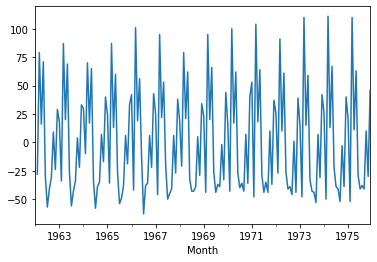

In [63]:
milk["Milk First Difference"].plot()

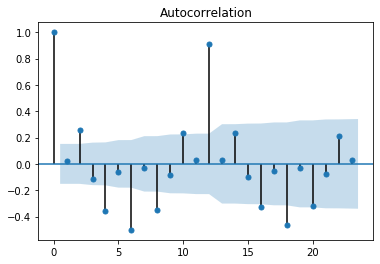

In [64]:
#Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf
fig=plot_acf(milk["Milk First Difference"].dropna())

In [66]:
model=sm.tsa.statespace.SARIMAX(milk["Monthly milk production (pounds per cow)"],order=(0,1,0),seasonal_order=(1,1,1,12))
result=model.fit()
print(result.summary())

C:\Users\Ujjual Ramachandran\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                      Statespace Model Results                                      
Dep. Variable:     Monthly milk production (pounds per cow)   No. Observations:                  168
Model:                       SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -534.065
Date:                                      Sun, 17 May 2020   AIC                           1074.131
Time:                                              18:17:31   BIC                           1083.261
Sample:                                          01-01-1962   HQIC                          1077.839
                                               - 12-01-1975                                         
Covariance Type:                                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106  

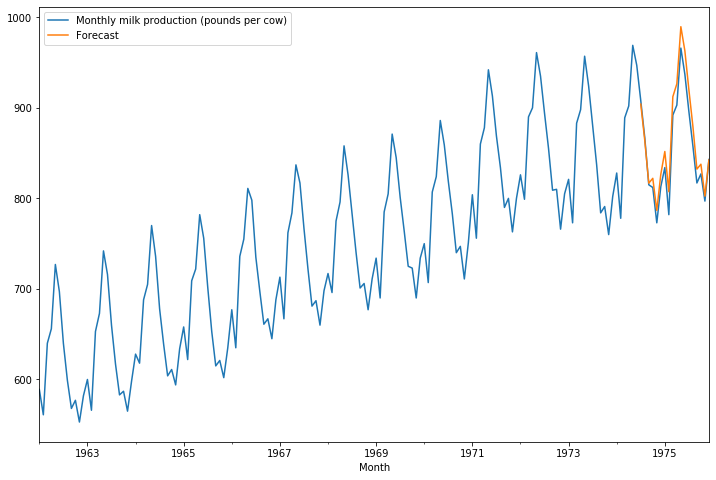

In [69]:
milk["Forecast"]=result.predict(start=150,end=168,dynamic=True)
milk[["Monthly milk production (pounds per cow)","Forecast"]].plot(figsize=(12,8))